In [1]:
from networkx.algorithms import isomorphism
import networkx as nx

S = [[[3, 4], [4, 9], [3, 7], [4, 6], [3, 10], [5, 7], [0, 2], [5, 10], [0, 5], [1, 6], [0, 8], [2, 5], [1, 3], [1, 9], [2, 8], [7, 10], [6, 8], [4, 5], [3, 9], [4, 8], [3, 6], [5, 9], [0, 1], [0, 7], [2, 4], [1, 2], [0, 4], [0, 10], [2, 7], [1, 5], [2, 10], [1, 8], [7, 9], [6, 7], [6, 10], [4, 7], [3, 5], [4, 10], [5, 8], [0, 3], [8, 10], [0, 9], [0, 6], [2, 9], [1, 7], [2, 6], [1, 10], [7, 8]], {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}]
G = [[[3, 4], [4, 9], [3, 7], [4, 6], [3, 10], [5, 7], [0, 2], [8, 9], [5, 10], [0, 5], [1, 6], [0, 8], [2, 5], [1, 3], [1, 9], [2, 8], [7, 10], [6, 8], [4, 5], [3, 9], [5, 6], [4, 8], [3, 6], [5, 9], [0, 1], [9, 10], [2, 4], [1, 2], [0, 4], [0, 10], [2, 7], [0, 7], [2, 10], [1, 8], [7, 9], [6, 7], [6, 10], [4, 7], [3, 5], [4, 10], [3, 8], [5, 8], [0, 3], [0, 9], [8, 10], [1, 4], [0, 6], [2, 3], [2, 9], [1, 7], [2, 6], [1, 10], [6, 9], [7, 8]], {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}]

S_nx = nx.Graph()
S_nx.add_edges_from(S[0])
for node, label in S[1].items():
    S_nx.nodes[node]['label'] = label

G_nx = nx.Graph()
G_nx.add_edges_from(G[0])
for node, label in G[1].items():
    G_nx.nodes[node]['label'] = label

node_match = isomorphism.categorical_node_match('label', None)

# Búsqueda de subgrafo isomorfo
GM = nx.algorithms.isomorphism.GraphMatcher(G_nx, S_nx, node_match=node_match)
GM.subgraph_is_isomorphic()

False

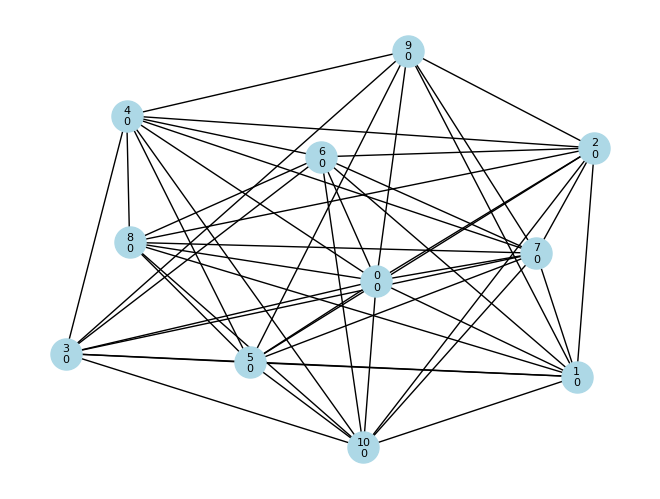

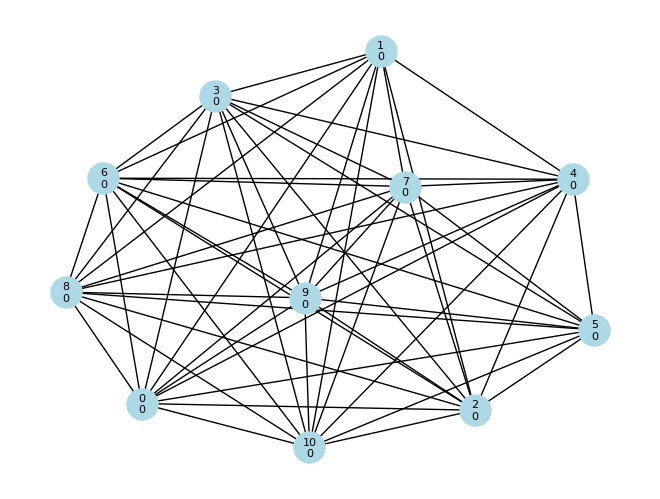

Labels de S: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
Labels de G: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
{0: (10, 98, 44), 1: (9, 90, 36), 2: (10, 98, 44), 3: (10, 98, 44), 4: (10, 98, 44), 5: (9, 90, 36), 6: (10, 98, 44), 7: (10, 98, 44), 8: (10, 98, 44), 9: (10, 98, 44), 10: (10, 98, 44)}
{0: (10, 86, 38), 1: (9, 78, 30), 2: (9, 79, 31), 3: (8, 71, 24), 4: (9, 78, 30), 5: (9, 79, 31), 6: (8, 72, 25), 7: (10, 86, 38), 8: (8, 73, 26), 9: (7, 64, 19), 10: (9, 80, 32)}
Isomorfismo encontrado. Mapeo: {0: 0, 7: 2, 1: 1, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 8: 8, 9: 9, 10: 10}


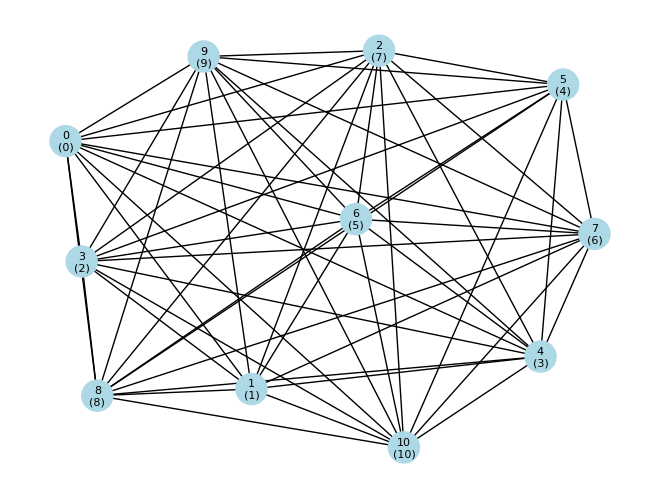

In [2]:
from backtracking_y_fingerprint import graph, BacktrackingFingerprintSolver, graficar_grafo
S_params = S
G_params = G

G = graph(nodes=G_params[1].keys(),
              edges=G_params[0],
              labels=G_params[1])
S = graph(nodes=S_params[1].keys(),
            edges=S_params[0],
            labels=S_params[1])

graficar_grafo(S)
graficar_grafo(G)

solver = BacktrackingFingerprintSolver(S, G)
print('Labels de S:', S.labels)
print('Labels de G:', G.labels)
print(solver.fingerprint_G)
print(solver.fingerprint_S)
mapeo = solver.compute_isomorphism_backtracking()

if mapeo:
    print(f"Isomorfismo encontrado. Mapeo: {mapeo}")
    solver.graficar_mapeo(mapeo)
else:
    print("No se encontró isomorfismo.")